Build NN using Keras functional API

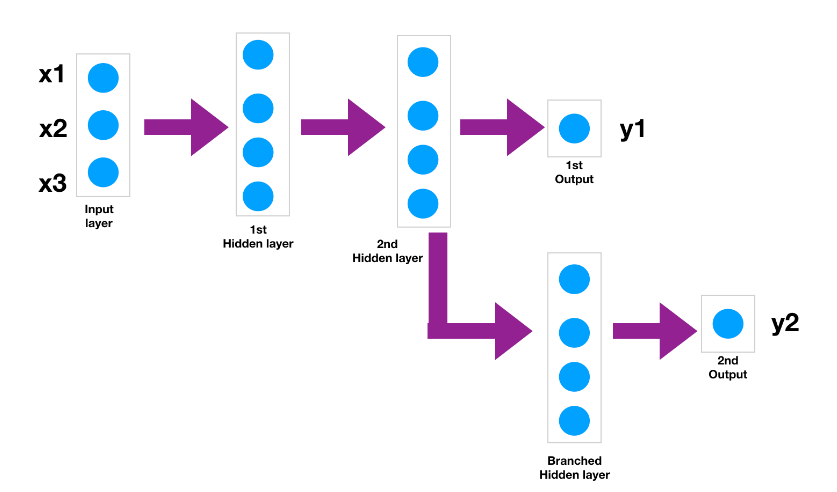

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

In [34]:
df = pd.read_excel("Folds5x2_pp.xlsx")
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [35]:
def get_outputs(data):
    y1 = data.pop('PE')
    y1 = np.array(y1)
    y2 = data.pop('V')
    y2 = np.array(y2)
    return y1, y2

In [36]:
# Splits the data into train/test with 80:20 ratio
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [37]:
y_train = get_outputs(train)
y_test = get_outputs(test)

In [38]:
train.head()

,AT,AP,RH
9061,6.61,1015.77,92.31
6937,22.72,1014.64,70.53
5631,10.06,1018.22,70.22
6218,27.53,1009.40,53.73
1362,23.89,1010.48,62.31


In [25]:
#Scaling the inputs
min_max = MinMaxScaler()
X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)

In [47]:
print(train.shape)
print(X_test.shape)

(7654, 3)
(1914, 5)


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [62]:
# define input layer
input_layer = Input(shape=(5,), name = 'input_layer')
Layer_1 = Dense(10, activation="relu", name = 'Layer_1')(input_layer)
Layer_2 = Dense(10, activation="relu", name = 'Layer_2')(Layer_1)

y1_output = Dense(1, activation="linear", name = "y1_output")(Layer_2)

y2_branched = Dense(10, activation="relu", name = 'Branched_layer')(Layer_2)
y2_output = Dense(1, activation="linear", name = 'y2_output')(y2_branched)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

#Model Summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 5)]          0           []                               
                                                                                                  
 Layer_1 (Dense)                (None, 10)           60          ['input_layer[0][0]']            
                                                                                                  
 Layer_2 (Dense)                (None, 10)           110         ['Layer_1[0][0]']                
                                                                                                  
 Branched_layer (Dense)         (None, 10)           110         ['Layer_2[0][0]']                
                                                                                            

In [63]:
model.compile(optimizer='adam', loss = {'y1_output':'mse', 'y2_output':'mse'})
model.fit(X_train, y_train, epochs=500, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/500
60/60 [==============================] - 1s 4ms/step - loss: 209711.3438 - y1_output_loss: 206603.5625 - y2_output_loss: 3107.8027 - val_loss: 209512.3281 - val_y1_output_loss: 206426.0938 - val_y2_output_loss: 3086.2288
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 209165.3750 - y1_output_loss: 206111.5625 - y2_output_loss: 3053.8162 - val_loss: 208737.7812 - val_y1_output_loss: 205755.0625 - val_y2_output_loss: 2982.7561
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 207930.5781 - y1_output_loss: 205086.1406 - y2_output_loss: 2844.4236 - val_loss: 206891.5625 - val_y1_output_loss: 204264.6875 - val_y2_output_loss: 2626.8630
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 205257.7500 - y1_output_loss: 202983.8906 - y2_output_loss: 2273.8735 - val_loss: 203263.5781 - val_y1_output_loss: 201452.6250 - val_y2_output_loss: 1810.9518
Epoch 5/500
60/60 [==============================] - 0s 2ms/step - l

60/60 [==============================] - 0s 948us/step


Text(0, 0.5, 'predicted energy output')

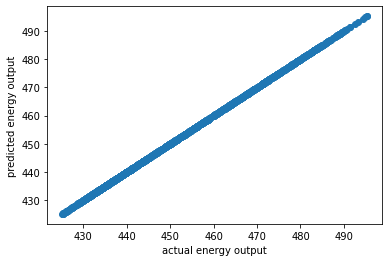

In [59]:
##model predictions

predictions = model.predict(X_test)

predicted_energy=predictions[0]

predicted_vacuum=predictions[1]
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')


Text(0, 0.5, 'predicted exhaust vacuum')

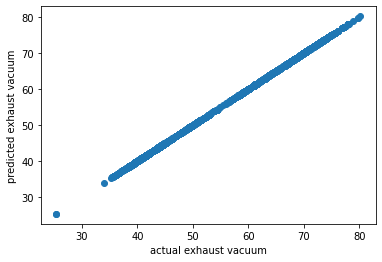

In [60]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vacuum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

In [61]:
print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))

print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vacuum))

r2 score for energy predicted : 0.9999999882959091
r2 score forexhaust vacuum predicted : 0.9999999938884604
